In [1]:
import numpy as np
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
from keras.layers import Flatten

Using TensorFlow backend.


create initial ResNet50 model pretrained on Imagenet

In [2]:
base_resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(224, 224, 3), classes=1000)

resize output of last AveragePooling layer to one dimentional array

In [3]:
flatFeaturesLayer = Flatten()(base_resnet.output)

build new model with one dimentional (size 2048) vector output

In [4]:
model = Model(inputs=base_resnet.input, outputs=flatFeaturesLayer)
model.compile('sgd', 'mse')

load some images with 2 different contexts (cats and sport)

In [5]:
imgRoot = 'imgs/'
imgPaths = ['sport1.jpg', 'sport2.jpg', 'cat1.jpg', 'cat2.jpg']
loadedImages = []
for img_path in imgPaths:
    img = image.load_img(imgRoot + img_path, target_size=(224, 224))
    loadedImages.append(img)

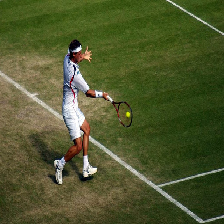

In [6]:
loadedImages[0]

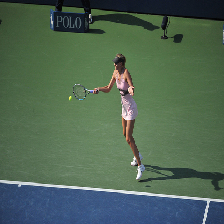

In [7]:
loadedImages[1]

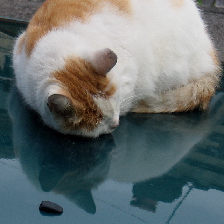

In [8]:
loadedImages[2]

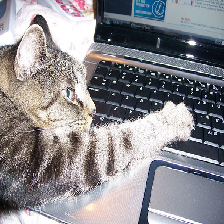

In [9]:
loadedImages[3]

prepare images to feed them into neural networks (normalize rgb channels, reshape and convert to numpy array)

In [10]:
preprocessedImages = []
for img in loadedImages:
    x = image.img_to_array(img)
    preprocessedImages.append(x)
    
preprocessedImages = np.array(preprocessedImages)
preprocessedImages = preprocess_input(preprocessedImages)

In [11]:
imageVectors = model.predict(preprocessedImages)
imageVectors.shape

(4, 2048)

get cosine similarity matrix of extracted 4 images vectors

In [12]:
from sklearn.metrics.pairwise import cosine_similarity
cosSims = cosine_similarity(imageVectors, imageVectors)

In [13]:
cosSims

array([[ 1.        ,  0.64281559,  0.26431036,  0.29843542],
       [ 0.64281559,  1.        ,  0.29636112,  0.32606241],
       [ 0.26431036,  0.29636112,  0.99999976,  0.45880157],
       [ 0.29843542,  0.32606241,  0.45880157,  1.        ]], dtype=float32)

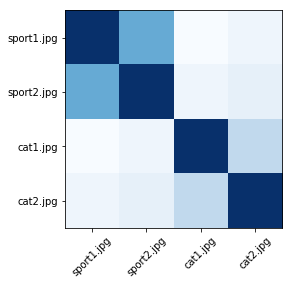

In [14]:
import pylab as plt
plt.imshow(cosSims, interpolation="none", cmap='Blues')
tick_marks = np.arange(len(cosSims))
plt.xticks(tick_marks, imgPaths, rotation=45)
plt.yticks(tick_marks, imgPaths)
plt.show()